In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Inputting data, normalization

dataset = pd.read_csv("C:/dev/projects/alfs/chomp/src/Learning/NumpyLearn/diabetes.csv")
 
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]:
	bad = (dataset[column] == 0)
	dataset.loc[bad, column] = None

normalized = (dataset - dataset.mean()) / dataset.std()
normalized["Outcome"] = (normalized["Outcome"] > 0.0)

dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1

In [3]:
# Extracting useful data (means, std)

# Two data sets
diabetic_normalized = normalized[normalized['Outcome'] == True]
not_diabetic_normalized = normalized[normalized['Outcome'] == False]

# Means and standard deviations (data set)
diabetic_means = (diabetic_normalized.mean()+2.0).drop(labels=['Outcome'])
diabetic_std = diabetic_normalized.std().drop(labels=['Outcome'])
not_diabetic_means = (not_diabetic_normalized.mean()+2.0).drop(labels=['Outcome'])
not_diabetic_std = not_diabetic_normalized.std().drop(labels=['Outcome'])

diabetic_means

Pregnancies                 2.302892
Glucose                     2.675695
BloodPressure               2.235520
SkinThickness               2.367146
Insulin                     2.431889
BMI                         2.425893
DiabetesPedigreeFunction    2.237298
Age                         2.325357
dtype: float64

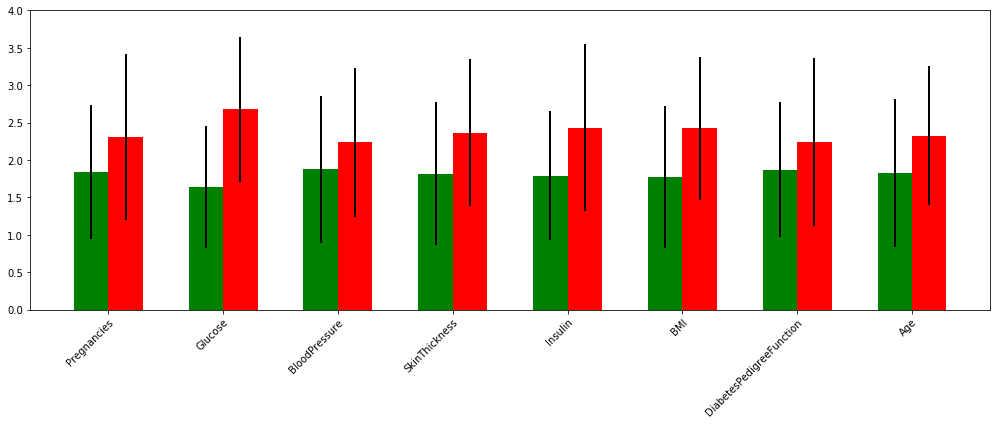

In [4]:
# Task 1: Plotting

# Setting figure size to 7x5
fig = plt.figure(figsize=(14,6))

# Setting index
ind = np.arange(8)     # [0 1 2 3 4 5 6 7]

# Setting width
width = 0.3

# Setting bottom (bottom is a list of where each bar will start)
bottom = ind - width / 2     # [-0.15  0.85  1.85  2.85  3.85  4.85  5.85  6.85]

# Error arguments specify layout of std lines
error_args = {'ecolor': (0, 0, 0), 'linewidth': 2.0}

# Inputting the two sets of data
plt.bar(bottom, not_diabetic_means, width, yerr=not_diabetic_std, error_kw=error_args, color = 'g')
plt.bar(bottom+width, diabetic_means, width, yerr=diabetic_std, error_kw=error_args, color = 'r')


# Y-axis ticks and labels 
ax = plt.gca()
ax.set_ylim(0.0, 4.0)

# Setting x ticks slightly forward to align inbetween two sets
ax.set_xticks(bottom+(width/2))

# List of data headings as the x labels
ax.set_xticklabels(diabetic_means.axes[0].tolist())

# Rotate x labels to make them readable
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


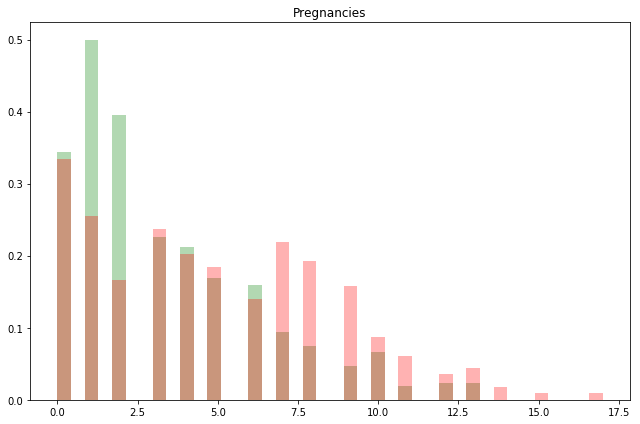

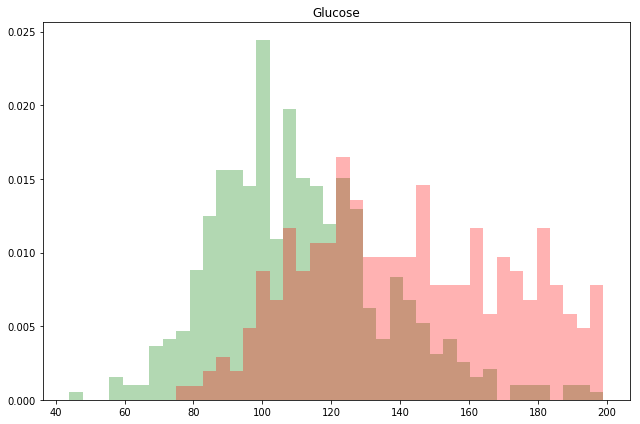

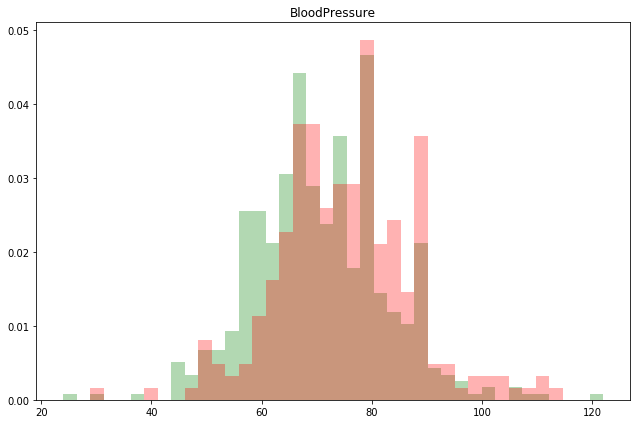

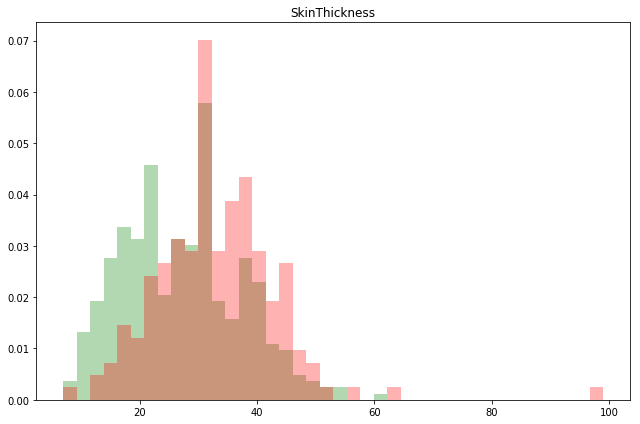

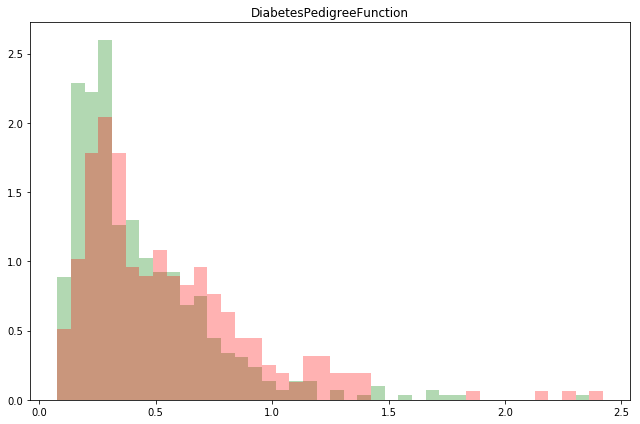

In [5]:
# Task 2: Histograms

features = dataset.columns[:-1]

# data for non normalized dataset, where Outcome = true and false
diabetic_positive_data = dataset[dataset['Outcome'] == True]
diabetic_negative_data = dataset[dataset['Outcome'] == False]

def histogram(feature):
    # gets columns from the two data sets:
    xx = diabetic_positive_data[feature]
    yy = diabetic_negative_data[feature]
    
    # do the plotting     
    fig = plt.figure(figsize=(9, 6))
    
    # Configure keyword arguments to customize histogram.
    # Alpha adjusts translucency while bins define spacing. 
    kwargs = {
        'histtype' : 'stepfilled', 
        'alpha'    : 0.3, 
        'density'  : True, 
        'bins'     : 40,
        'color'    : ['r', 'g'],
    }
    
    plt.title(feature)
    plt.hist([xx, yy],  **kwargs)
    #plt.show()
    fig.savefig('C:/dev/projects/alfs/chomp/src/Learning/NumpyLearn/Histograms/histogram_%s.png' % feature)
    plt.tight_layout()
    
for feature in features:
    histogram(feature)

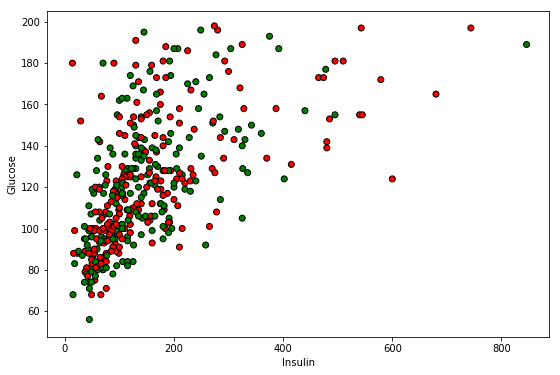

In [6]:
# Task 3: Scatters

pairs = [
	('Pregnancies', 'Age'),
	('Insulin', 'Glucose'),
	('BMI', 'SkinThickness'),
]
 
def scatterplot(v1, v2):
    xPos = diabetic_positive_data[v1]
    yPos = diabetic_positive_data[v2]
    xNeg = diabetic_negative_data[v1]
    yNeg = diabetic_negative_data[v2]
    
    fig = plt.figure(figsize=(9, 6))
    
    kwargs = {
        'color'    : ['r','g'],
        'edgecolors' : ['k']*2
    }    
    
    # Need to create a reference to an Axes object to keep drawing on the same subplot
    ax1 = fig.add_subplot(111)
    ax1.scatter(xPos, yPos, **kwargs)
    ax1.scatter(xNeg, yNeg, **kwargs)
    
    #plt.show()
    plt.xlabel(v1)
    plt.ylabel(v2)

for v1, v2 in pairs:
	scatterplot(v1, v2)

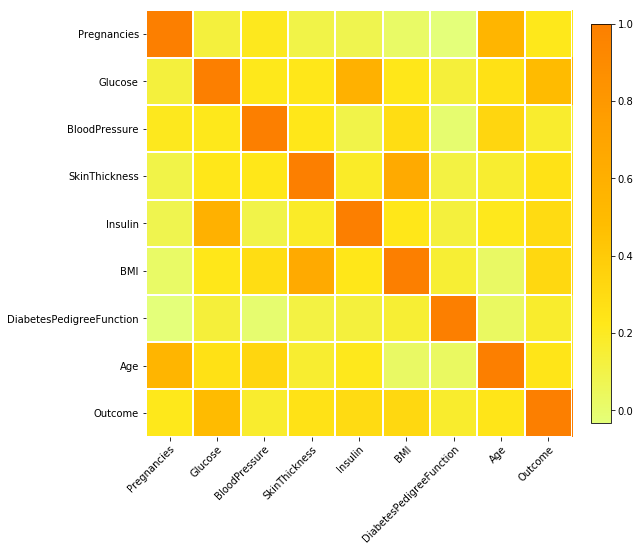

In [ ]:
# Task 4: Correlation Heatmap

def heatmap(data, row_labels, col_labels):
# Adapted from https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
    """
    Create a heatmap from a numpy array and two lists of labels.
 
    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels for the rows
        col_labels : A list or array of length M with the labels for the columns
 
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """
    fig = plt.figure(figsize=(9, 9))
 
    ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, cmap="Wistia", interpolation="nearest")
 
    # Create colorbar
    ax.figure.colorbar(im, ax=ax, fraction=0.043, pad=0.04)
 
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
 
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
 
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
 
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.tight_layout()
 
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
 
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
 
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False, right=False, top=False)
 
    # plt.show()
    fig.savefig('C:/dev/projects/alfs/chomp/src/Learning/NumpyLearn/Heatmaps/heatmap.png')
    

# Creates an empty dataframe, with columns in place that replicate those in the normalized data frame
correlation_array = pd.DataFrame(columns=normalized.columns.get_values())

# For each column ID, create a new row of data showing pearson correlation between that column & others from normalized dataset
for column in correlation_array:
    #print(normalized.corr(method='pearson')[column])
    correlation_array = correlation_array.append(normalized.corr(method='pearson')[column])

# Creates a list of the headings from the correlation array
columnsID = list(correlation_array.index)

# Passes the heatmap function the correlation array and the columnIDs (also the rowIDs which are equivalent)
heatmap(correlation_array, columnsID, columnsID)